# RBE/CS549 Fall 2022: Computer Vision
## Homework 0: Alohomora

Author(s): 
Prof. Nitin J. Sanket (nsanket@wpi.edu), Lening Li (lli4@wpi.edu), Gejji, Vaishnavi Vivek (vgejji@wpi.edu)

Robotics Engineering Department,

Worcester Polytechnic Institute

Code adapted from CMSC733 at the University of Maryland, College Park.


## Phase 1




### Get the BSDS500 dataset

In [ ]:
!wget https://raw.githubusercontent.com/leelening/rbe549/main/hw0/BSDS500.tar.xz
!tar -xvf BSDS500.tar.xz
!mv BSDS500/ /content/data/

In [ ]:
!wget https://raw.githubusercontent.com/leelening/rbe549/main/hw0/TxtFiles.tar.xz
!tar -xvf TxtFiles.tar.xz
!mv TxtFiles/ /content/data/

In [62]:
import numpy as np
import math 
import matplotlib.pyplot as plt
import cv2 as cv
from scipy import signal
from scipy.ndimage import rotate
from sklearn.cluster import KMeans

In [36]:
%matplotlib notebook 

1. Generate Difference of Gaussian Filter Bank: (DoG)
2. Display all the filters in this filter bank and save image as DoG.png,
3. use command "cv2.imwrite(...)"

In [14]:
def oriented_dog():
    
    sigma_dict={1:2,2:1}
    angle_dict={1:0,2:24.5,3:48,4:72,5:96,6:120,7:144,8:168,9:192,10:216,11:240,12:264,13:288,14:312,15:336,16:360}
    size=11
    o_dog=[]

    i=0
    fig,axs=plt.subplots(len(sigma_dict.keys()),len(angle_dict.keys()))
    for sigma in sigma_dict.keys():
        for a in angle_dict.keys():
            filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])             
            kernel = np.fromfunction(lambda x, y: (1/(2*math.pi*sigma_dict[sigma]**2)) * math.e ** ((-1*((x-(size-1)/2)**2+(y-(size-1)/2)**2))/(2*sigma_dict[sigma]**2)), (size, size))
            dog=signal.convolve2d(kernel,filter)
            new_filter=rotate(dog, angle=angle_dict[a],reshape=False)                      
            o_dog.append(new_filter)
   
    m=len(o_dog)
    
    
   # for j in range(m):
        
  #      plt.subplot(2,16,j+1)
  #      plt.axis('off')
  #      plt.imshow(o_dog[j], cmap = 'Greys_r',interpolation='none')      
    
  #  plt.savefig("C:/Users/gsaiu/Downloads/YourDirectoryID_hw0/YourDirectoryID_hw0/results/dog.png")
    return o_dog



<IPython.core.display.Javascript object>


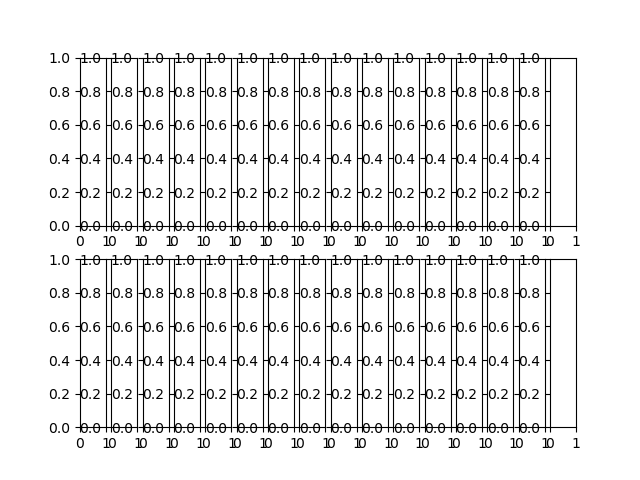

[array([[-7.68103295e-05, -2.36592471e-04, -4.90745504e-04,
         -8.23741421e-04, -9.75220876e-04, -6.87861150e-04,
          1.20821080e-19,  6.87861150e-04,  9.75220876e-04,
          8.23741421e-04,  4.90745504e-04,  2.36592471e-04,
          7.68103295e-05],
        [-3.90213130e-04, -1.20194106e-03, -2.49309358e-03,
         -4.18478505e-03, -4.95433353e-03, -3.49448380e-03,
          5.17234234e-19,  3.49448380e-03,  4.95433353e-03,
          4.18478505e-03,  2.49309358e-03,  1.20194106e-03,
          3.90213130e-04],
        [-1.11755111e-03, -3.44229975e-03, -7.14009671e-03,
         -1.19850174e-02, -1.41889662e-02, -1.00080288e-02,
          1.20495066e-18,  1.00080288e-02,  1.41889662e-02,
          1.19850174e-02,  7.14009671e-03,  3.44229975e-03,
          1.11755111e-03],
        [-2.43203803e-03, -7.49120452e-03, -1.55384274e-02,
         -2.60820449e-02, -3.08783242e-02, -2.17796810e-02,
          2.54539557e-18,  2.17796810e-02,  3.08783242e-02,
          2.6082044

In [15]:
#oriented_dog()


1. Generate Leung-Malik Filter Bank: (LM)
2. Display all the filters in this filter bank and save image as LM.png,
3. use command "cv2.imwrite(...)"


In [24]:
def leung_malik_small():
    lms=[]
    sigma_s={1:1,2:1.414,3:2}
    sigma_sl=2.828
    angle_s={1:0,2:30,3:60,4:90,5:120,6:150}
    size=49
    j=0
    
    for sigma_x in sigma_s.keys():
        for angle in angle_s.keys():           
            gaussian_derivative = np.fromfunction(lambda x, y: (-0.318/sigma_s[sigma_x]**4) * (x-(size-1)/2) * math.e ** (-1*((x-(size-1)/2)**2/sigma_s[sigma_x]**2+(y-(size-1)/2)**2/(3*sigma_s[sigma_x])**2)), (size, size))
            lms.append(rotate(gaussian_derivative, angle=angle_s[angle],reshape=False))
        for angle in angle_s.keys():  
            gaussian_derivative_second = np.fromfunction(lambda x, y: (0.16/sigma_s[sigma_x]**6) * (4*x**2+4*x-4*size*x-2*sigma_s[sigma_x]**2+size**2-2*size+1) * math.e ** (-1*((x-(size-1)/2)**2/sigma_s[sigma_x]**2+(y-(size-1)/2)**2/(3*sigma_s[sigma_x])**2)), (size, size))
            lms.append(rotate(gaussian_derivative_second, angle=angle_s[angle],reshape=False))
            
    
    
    sigma_g={1:1,2:1.414,3:2,4:2.828,5:3,6:4.242,7:6,8:8.484}
    for sigma_x in sigma_g.keys():
        #laplace_gaussian=np.fromfunction(lambda x, y: ((0.16/sigma_g[sigma_x]**6) * (4*x**2+4*x-4*size*x-2*sigma_g[sigma_x]**2+size**2-2*size+1) * math.e ** (-1*((x-(size-1)/2)**2/sigma_g[sigma_x]**2+(y-(size-1)/2)**2/(sigma_g[sigma_x])**2))) + ((0.16/sigma_g[sigma_x]**6) * (4*y**2+4*y-4*size*y-2*sigma_g[sigma_x]**2+size**2-2*size+1) * math.e ** (-1*((x-(size-1)/2)**2/sigma_g[sigma_x]**2+(y-(size-1)/2)**2/(sigma_g[sigma_x])**2))) , (size, size))
        laplace_gaussian=np.fromfunction(lambda x, y: ((1/(2*math.pi*sigma_g[sigma_x]**2)) * math.e ** ((-1*((x-(size-1)/2)**2+(y-(size-1)/2)**2))/(2*sigma_g[sigma_x]**2))) * ((x-(size-1)/2)**2 + (y-(size-1)/2)**2 - sigma_g[sigma_x]**2)/sigma_g[sigma_x]**4 , (size, size))
        lms.append(laplace_gaussian)
        
    for sigma_x in sigma_s.keys():
        
        gaussian = np.fromfunction(lambda x, y: (1/(2*math.pi*sigma_s[sigma_x]**2)) * math.e ** ((-1*((x-(size-1)/2)**2+(y-(size-1)/2)**2))/(2*sigma_s[sigma_x]**2)), (size, size))
        lms.append(gaussian)
        
    lms.append(np.fromfunction(lambda x, y: (1/(2*math.pi*2.828**2)) * math.e ** ((-1*((x-(size-1)/2)**2+(y-(size-1)/2)**2))/(2*2.828**2)), (size, size)))
    m=len(lms)
    
   # for j in range(m):
        
   #     plt.subplot(4,12,j+1)
   #     plt.axis('off')
   #     plt.imshow(lms[j], cmap = 'Greys_r',interpolation='none') 
    
    
   # plt.savefig("C:/Users/gsaiu/Downloads/YourDirectoryID_hw0/YourDirectoryID_hw0/results/leung_malik_small.png")
    return lms

    
def leung_malik_large():
    lml=[]
    sigma_s={1:1.414,2:2,3:2.828}
    
    angle_s={1:0,2:-30,3:-60,4:-90,5:-120,6:-150}
    size=49
    j=0
    
    for sigma_x in sigma_s.keys():
        for angle in angle_s.keys():           
            gaussian_derivative = np.fromfunction(lambda x, y: (-0.318/sigma_s[sigma_x]**4) * (x-(size-1)/2) * math.e ** (-1*((x-(size-1)/2)**2/sigma_s[sigma_x]**2+(y-(size-1)/2)**2/(3*sigma_s[sigma_x])**2)), (size, size))
            lml.append(rotate(gaussian_derivative, angle=angle_s[angle],reshape=False))
        for angle in angle_s.keys():  
            gaussian_derivative_second = np.fromfunction(lambda x, y: (0.16/sigma_s[sigma_x]**6) * (4*x**2+4*x-4*size*x-2*sigma_s[sigma_x]**2+size**2-2*size+1) * math.e ** (-1*((x-(size-1)/2)**2/sigma_s[sigma_x]**2+(y-(size-1)/2)**2/(3*sigma_s[sigma_x])**2)), (size, size))
            lml.append(rotate(gaussian_derivative_second, angle=angle_s[angle],reshape=False))
            
    
    
    sigma_g={1:1.414,2:2,3:2.828,4:4,5:4.242,6:6,7:8.484,8:12}
    for sigma_x in sigma_g.keys():
        #laplace_gaussian=np.fromfunction(lambda x, y: ((0.16/sigma_g[sigma_x]**6) * (4*x**2+4*x-4*size*x-2*sigma_g[sigma_x]**2+size**2-2*size+1) * math.e ** (-1*((x-(size-1)/2)**2/sigma_g[sigma_x]**2+(y-(size-1)/2)**2/(sigma_g[sigma_x])**2))) + ((0.16/sigma_g[sigma_x]**6) * (4*y**2+4*y-4*size*y-2*sigma_g[sigma_x]**2+size**2-2*size+1) * math.e ** (-1*((x-(size-1)/2)**2/sigma_g[sigma_x]**2+(y-(size-1)/2)**2/(sigma_g[sigma_x])**2))) , (size, size))
        laplace_gaussian=np.fromfunction(lambda x, y: ((1/(2*math.pi*sigma_g[sigma_x]**2)) * math.e ** ((-1*((x-(size-1)/2)**2+(y-(size-1)/2)**2))/(2*sigma_g[sigma_x]**2))) * ((x-(size-1)/2)**2 + (y-(size-1)/2)**2 - sigma_g[sigma_x]**2)/sigma_g[sigma_x]**4 , (size, size))
        
        lml.append(laplace_gaussian)
        
    for sigma_x in sigma_s.keys():
        
        gaussian = np.fromfunction(lambda x, y: (1/(2*math.pi*sigma_s[sigma_x]**2)) * math.e ** ((-1*((x-(size-1)/2)**2+(y-(size-1)/2)**2))/(2*sigma_s[sigma_x]**2)), (size, size))
        lml.append(gaussian)
        
    lml.append(np.fromfunction(lambda x, y: (1/(2*math.pi*2.828**2)) * math.e ** ((-1*((x-(size-1)/2)**2+(y-(size-1)/2)**2))/(2*2.828**2)), (size, size)))
    m=len(lml)
    
    
   # for j in range(m):
        
    #    plt.subplot(4,12,j+1)
    #    filter_normalized=cv.normalize(lml[j],dst=None,alpha=0,beta=255,norm_type=cv.NORM_MINMAX)
    #    plt.axis('off')
    #    plt.imshow(filter_normalized, cmap = 'Greys_r',interpolation='none') 
        
   # plt.savefig("C:/Users/gsaiu/Downloads/YourDirectoryID_hw0/YourDirectoryID_hw0/results/leung_malik_large.png")
    return lml
    

In [26]:
#leung_malik_small()

    

In [ ]:
#leung_malik_large()

1. Generate Gabor Filter Bank: (Gabor)
2. Display all the filters in this filter bank and save image as Gabor.png,
3. use command "cv2.imwrite(...)"


In [28]:
def gabor():
    gabor=[] 
    sigma_s={1:6,2:9,3:12,4:15,5:18}
    size=49
    psi=180
    gamma=1
    Lambda=7
    angle_s={1:0,2:-135,3:22.5,4:45,5:67.5,6:90,7:112.5,8:135}
  # angle_s={1:90,2:112,3:135,4:157.5,5:180,6:202.5,7:225,8:247.5}
    for sigma in sigma_s.keys():
        for a in angle_s.keys():
                sigma_y=sigma_s[sigma]/gamma
                
              # x_theta = x * np.cos(angle_s[a]) + y * np.sin(angle_s[a])  
              # y_theta = -x * np.sin(angle_s[a]) + y * np.cos(angle_s[a])
                gabor.append(np.fromfunction(lambda x, y: np.exp(-.5 * (((x-(size-1)/2) * np.cos(angle_s[a]) + (y-(size-1)/2) * np.sin(angle_s[a])) ** 2 / sigma_s[sigma] ** 2 + gamma**2 * (-(x-(size-1)/2) * np.sin(angle_s[a]) + (y-(size-1)/2) * np.cos(angle_s[a])) ** 2 / sigma_y ** 2)) * np.cos(2 * np.pi / Lambda * ((x-(size-1)/2) * np.cos(angle_s[a]) + (y-(size-1)/2) * np.sin(angle_s[a])) + psi), (size, size)))
        Lambda=Lambda+3
    
    m=len(gabor)
    
   # for j in range(m):
        
    #    plt.subplot(5,8,j+1)
     #   plt.axis('off')
    #    plt.imshow(gabor[j], cmap = 'Greys_r',interpolation='none')
        
   # plt.savefig("C:/Users/gsaiu/Downloads/YourDirectoryID_hw0/YourDirectoryID_hw0/results/gabor.png")
    return gabor




<IPython.core.display.Javascript object>


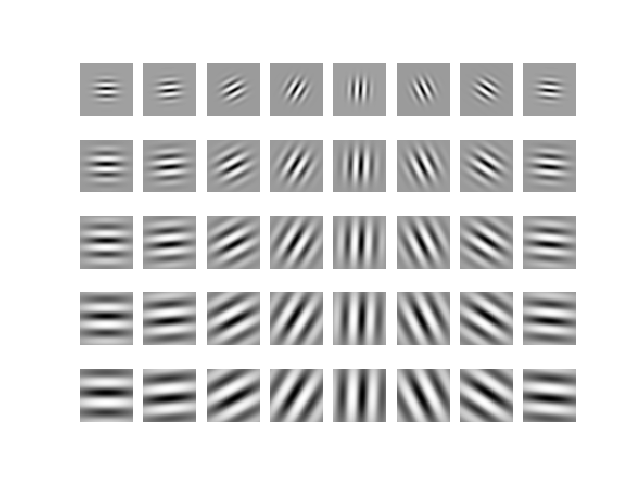

[array([[ 2.15602529e-08,  4.14144251e-08,  7.73723322e-08, ...,
          7.73723322e-08,  4.14144251e-08,  2.15602529e-08],
        [-1.40052702e-07, -2.69022917e-07, -5.02600978e-07, ...,
         -5.02600978e-07, -2.69022917e-07, -1.40052702e-07],
        [-4.03648154e-07, -7.75355296e-07, -1.44855440e-06, ...,
         -1.44855440e-06, -7.75355296e-07, -4.03648154e-07],
        ...,
        [ 1.02267996e-07,  1.96443441e-07,  3.67004665e-07, ...,
          3.67004665e-07,  1.96443441e-07,  1.02267996e-07],
        [ 1.97626134e-07,  3.79613949e-07,  7.09212226e-07, ...,
          7.09212226e-07,  3.79613949e-07,  1.97626134e-07],
        [ 9.97963046e-08,  1.91695645e-07,  3.58134614e-07, ...,
          3.58134614e-07,  1.91695645e-07,  9.97963046e-08]]),
 array([[-7.49636857e-08, -1.30767981e-07, -2.18058344e-07, ...,
          8.88841935e-08,  3.07185278e-08,  7.11532483e-09],
        [ 3.55207958e-08,  1.00470003e-07,  2.46753105e-07, ...,
         -4.83048454e-07, -2.83488201e

In [32]:
#gabor()

1. Generate Half-disk masks
2. Display all the Half-disk masks and save image as HDMasks.png,
3. use command "cv2.imwrite(...)"

In [37]:
def half_disk_mask(radius, angle):
        size = 2*radius
        center = radius
        mask = np.zeros((size,size))
        for x in range(radius):
            for y in range(size):
                dist = np.sqrt((x-center)**2 + (y-center)**2)
                if dist <= radius:
                    mask[x,y] = 1


        mask = rotate(mask, angle,reshape=False)
        mask[mask<=0.5] = 0
        mask[mask>0.5] = 1
        
        
        return mask
    
def half_disk_bank(radius,orientation):
    half_disk_bank=[]
    for i in radius:
        for j in range(int((orientation)/2)):
            if j==0:
                angle= 0
            else: 
                angle= j * 360/orientation
            half_disk=half_disk_mask(i, angle)
            half_disk_bank.append(half_disk)
            half_disk_opposite=half_disk_mask(i, angle+180)
            half_disk_bank.append(half_disk_opposite)
    

 #   for j in range(len(half_disk_bank)):
        
   #     plt.subplot(6,8,j+1)
    #    plt.axis('off')
    #    plt.imshow(half_disk_bank[j], cmap = 'Greys_r',interpolation='none') 

   # plt.savefig("C:/Users/gsaiu/Downloads/YourDirectoryID_hw0/YourDirectoryID_hw0/results/HDMasks.png")
    return half_disk_bank


<IPython.core.display.Javascript object>


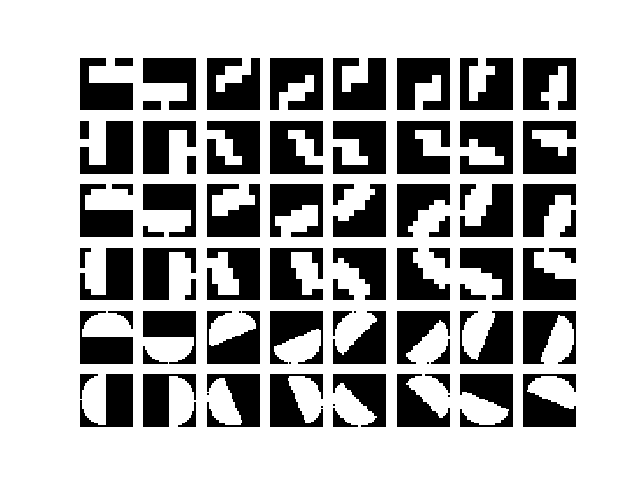

[array([[0., 0., 0., 1., 0., 0.],
        [0., 1., 1., 1., 1., 1.],
        [0., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 0.],
        [0., 0., 1., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 1., 0.],
        [0., 0., 1., 1., 1., 0.],
        [0., 1., 1., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 1., 1., 1., 0.],
        [0., 1., 1., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0.]]),
 array([[0., 0., 0., 1., 0., 0.],
        [0., 1., 1., 1., 0., 0.],
        [0., 1., 1., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
      

In [38]:
#half_disk_bank([5,10,25],16)

In [71]:
def get_image():
    img = cv.imread('./Phase1/BSDS500/Images/10.jpg')
    #img = cv.imread(r'C:\Users\gsaiu\Downloads\YourDirectoryID_hw0\YourDirectoryID_hw0\Phase1\BSDS500\Images\10.jpg')
    return img

1. Generate Texton Map
2. Filter image using oriented gaussian filter bank
3. Generate texture ID's using K-means clustering
4. Display texton map and save image as TextonMap_ImageName.png

In [347]:
def texton_map():
    filter_total=[]
    filtered_image=[] 
   
    gray_img = cv.cvtColor(get_image(), cv.COLOR_BGR2GRAY)
    
    filter_total=oriented_dog()+leung_malik_small()+leung_malik_large()+gabor()
    noOfFilter=len(oriented_dog()+leung_malik_small()+leung_malik_large()+gabor())

    
    
    for i in range(noOfFilter):
        f = cv.filter2D(gray_img, -1,filter_total[i])
        filtered_image.append(f)
    
    filtered_image=np.transpose(filtered_image, (1, 2, 0))
    
    filtered_image_new = filtered_image.reshape((filtered_image.shape[0]*filtered_image.shape[1]),filtered_image.shape[2])

    kmeans = KMeans(n_clusters=64,  init='k-means++', n_init=5, max_iter=300, tol=0.0001, verbose=0, random_state=None,copy_x=True, algorithm='elkan')               
    
    labels = kmeans.fit_predict(filtered_image_new)
  
    (a,b)=np.shape(gray_img)
    
    m=np.reshape(labels,(a,b)) 
    
 #   fig = plt.figure(figsize=(10,6))
  #  plt.imshow(m)
 #   plt.show()
  #  plt.axis('off')
    
    #plt.savefig("C:/Users/gsaiu/Downloads/YourDirectoryID_hw0/YourDirectoryID_hw0/results/TextonMap_10.png")
    return m
#texton_map()

In [ ]:
#texton_map()

1. Generate Texton Gradient (Tg)
2. Perform Chi-square calculation on Texton Map
3. Display Tg and save image as Tg_ImageName.png,
4. use command "cv2.imwrite(...)"


In [348]:
def chisquare(map,bins,half_disk_bank):
    #chi_distance=[]  
    (r,c)=np.shape(map)
    chi_distance=np.zeros((r, c, 24), dtype=np.float32)
    i=0
    n=0
    while n<(len(half_disk_bank)):
        left_mask=half_disk_bank[n]
        right_mask=half_disk_bank[n+1]
        chi_sq_dist=np.zeros(np.shape(map))
        tmp=np.zeros(np.shape(map))
        
        for b in range(bins):
            tmp[map == n] = 1
            tmp[map != n] = 0
            g_i=cv.filter2D(tmp,-1,left_mask)
            h_i=cv.filter2D(tmp,-1,right_mask)
            chi_sq_dist+= (g_i-h_i)**2/(g_i+h_i+np.exp(-10))
        
        chi_distance[:,:,i]=chi_sq_dist/2
        
        n=n+2
        i+=1

    return np.mean(chi_distance,axis=2)  

In [349]:
def texton_gradient():
    map=texton_map()
    bank=half_disk_bank([5,10,25], 16)
    texton_gradient=chisquare(map,64,bank)


 #   fig = plt.figure(figsize=(10,6))
 #   plt.figimage(texton_gradient, 75, 25)
  #  plt.show
   # print(np.shape(texton_gradient))
  #  plt.savefig("C:/Users/gsaiu/Downloads/YourDirectoryID_hw0/YourDirectoryID_hw0/results/Tg_10.png")
    return texton_gradient



In [ ]:
#texton_gradient()

1. Generate Brightness Map
2. Perform brightness binning


In [350]:
def brightness_map():
    gray_img = cv.cvtColor(get_image(), cv.COLOR_BGR2GRAY)
    reshaped=gray_img.reshape((-1,1))
    kmeans = KMeans(n_clusters=16,  init='k-means++', n_init=5, max_iter=300, tol=0.0001, verbose=0, random_state=None,copy_x=True, algorithm='elkan')               
    
    labels = kmeans.fit_predict(reshaped)
    (a,b)=np.shape(gray_img)
    
    m=np.reshape(labels,(a,b)) 
    
      
  #  plt.figimage(m, 75, 25)
   # plt.show()
   # plt.savefig("C:/Users/gsaiu/Downloads/YourDirectoryID_hw0/YourDirectoryID_hw0/results/BrightnessMap_10.png")
    return m


In [ ]:
#brightness_map()

1. Generate Brightness Gradient (Bg)
2. Perform Chi-square calculation on Brightness Map
3. Display Bg and save image as Bg_ImageName.png,
4. use command "cv2.imwrite(...)"



In [351]:
def brightness_gradient():
    
    map=brightness_map()
    bank=half_disk_bank([5,10,25], 16)
    brightness_gradient=chisquare(map,16,bank)


   # fig = plt.figure(figsize=(10,6))
  #  plt.figimage(brightness_gradient, 75, 25)
  #  plt.show
  #  plt.savefig("C:/Users/gsaiu/Downloads/YourDirectoryID_hw0/YourDirectoryID_hw0/results/Bg_10.png")
    return brightness_gradient


In [ ]:
#brightness_gradient()

1. Generate Color Map
2. Perform color binning or clustering


In [352]:
def color_map():
    img=get_image()
    reshaped=img.reshape((-1,3))
    kmeans = KMeans(n_clusters=16,  init='k-means++', n_init=5, max_iter=300, tol=0.0001, verbose=0, random_state=None,copy_x=True, algorithm='elkan')               
    
    labels = kmeans.fit_predict(reshaped)
    (a,b,c)=np.shape(img)
    
    m=np.reshape(labels,(a,b)) 
    
 #   fig = plt.figure(figsize=(10,6))
 #   plt.figimage(m, 75, 25)
   # plt.imshow(np.float32(m))
 #   plt.show()
 #   plt.savefig("C:/Users/gsaiu/Downloads/YourDirectoryID_hw0/YourDirectoryID_hw0/results/ColorMap_10.png")
    return m




In [ ]:
#color_map()




1. Generate Color Gradient (Cg)
2. Perform Chi-square calculation on Color Map
3. Display Cg and save image as Cg_ImageName.png,
4. use command "cv2.imwrite(...)"



In [353]:
def color_gradient():
    
    map=color_map()
    bank=half_disk_bank([5,10,25], 16)
    color_gradient=chisquare(map,16,bank)



   # fig = plt.figure(figsize=(10,6))
   # plt.figimage(color_gradient, 75, 25)
    #plt.show
  #  plt.savefig("C:/Users/gsaiu/Downloads/YourDirectoryID_hw0/YourDirectoryID_hw0/results/Cg_10.png")
    return color_gradient
#color_gradient()

In [ ]:
#color_gradient()


1. Read Sobel Baseline
2. use command "cv2.imread(...)"


In [61]:
def get_sobel():
    #sobel=cv.imread(r"C:\Users\gsaiu\Downloads\YourDirectoryID_hw0\YourDirectoryID_hw0\Phase1\BSDS500\SobelBaseline\10.png",0)
    sobel=cv.imread("./Phase1/BSDS500/SobelBaseline/10.png",0)
   # print(np.shape(sobel))
    return sobel


(481, 321)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)




1. Read Canny Baseline
2. use command "cv2.imread(...)"



In [69]:
def get_canny():
    #canny = cv.imread(r"C:\Users\gsaiu\Downloads\YourDirectoryID_hw0\YourDirectoryID_hw0\Phase1\BSDS500\CannyBaseline\10.png",0)
    canny = cv.imread("./Phase1/BSDS500/CannyBaseline/1.png",0)

    return canny



1. Combine responses to get pb-lite output
2. Display PbLite and save image as PbLite_ImageName.png
3. use command "cv2.imwrite(...)"



In [59]:
def pb_lite():
    tgt=texton_gradient()
    bgt=brightness_gradient()
    cgt=color_gradient()
    total_gradient=(tgt + bgt + cgt)/3
    sobelpb=get_sobel()
    cannypb=get_canny()
    baseline=  (sobelpb/2) + (cannypb/2)
    pb_lite=np.multiply(total_gradient, baseline)
    fig = plt.figure(figsize=(10,6))
    plt.imshow(pb_lite,cmap='gray')
    plt.show
    plt.axis('off')
 #   plt.savefig("C:/Users/gsaiu/Downloads/YourDirectoryID_hw0/YourDirectoryID_hw0/results/PbLite_10.png")


In [ ]:
pb_lite()

## Phase 2

### Neural Network Construction

In [4]:
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import math


def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

def loss_fn(out, labels):
    ###############################################
    # Fill your loss function of choice here!
    ###############################################
    loss = nn.CrossEntropyLoss()
    loss = loss(out,labels)

    return loss

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = loss_fn(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = loss_fn(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'loss': loss.detach(), 'acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'loss': epoch_loss.item(), 'acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], loss: {:.4f}, acc: {:.4f}".format(epoch, result['loss'], result['acc']))



class BatchNorm(ImageClassificationBase):
    def __init__(self, InputSize, OutputSize):
        super(ImageClassificationBase, self).__init__()
        self.model=nn.Sequential(
            nn.Conv2d(3,6,(5,5)),
            nn.BatchNorm2d(6),
            nn.MaxPool2d((2,2),stride=2),
            nn.ReLU(),    
            nn.Conv2d(6,16,(5,5)),
            nn.BatchNorm2d(16),
            nn.MaxPool2d((5,5),stride=2),
            nn.ReLU(),
            nn.Flatten(),
            #nn.Linear(16*5*5,120),
            nn.Linear(144,120),
            nn.ReLU(),
            nn.Linear(120,10)

         )
      
    def forward(self, xb):
    

        self.out=self.model(xb)  
        return self.out
    

    
class BaseClass(ImageClassificationBase):
    def __init__(self, InputSize, OutputSize):
        super(BaseClass, self).__init__()
        self.model=nn.Sequential(
            nn.Conv2d(3,6,(5,5)),
            nn.MaxPool2d((2,2),stride=2),
            nn.Dropout(0.2),
            nn.ReLU(),    
            nn.Conv2d(6,16,(5,5)),
            nn.MaxPool2d((5,5),stride=2),
            nn.Dropout(0.2),
            nn.ReLU(),
            nn.Flatten(),
            #nn.Linear(16*5*5,120),
            nn.Linear(144,120),
            nn.ReLU(),
            nn.Linear(120,10)

         )
      
    def forward(self, xb):
    

        self.out=self.model(xb)  
        return self.out



    
 


    
    
    
    
class block(ImageClassificationBase):
    def __init__(self, in_channels, out_channels, identity_downsample=None,stride=1):
        super(block, self).__init__()
        self.expansion=4
        self.conv1=nn.Conv2d(in_channels, out_channels,kernel_size=1,stride=1,padding=0)
        self.bn1=nn.BatchNorm2d(out_channels)
        self.relu1=nn.ReLU()
        self.conv2=nn.Conv2d(out_channels, out_channels,kernel_size=3,stride=stride,padding=1)
        self.bn2=nn.BatchNorm2d(out_channels)
        self.relu2=nn.ReLU()
        self.conv3=nn.Conv2d(out_channels, out_channels*self.expansion,kernel_size=1,stride=1,padding=0)
        self.bn3=nn.BatchNorm2d(out_channels*self.expansion)
        self.relu3=nn.ReLU()
        self.identity_downsample=identity_downsample
        
        
    def forward(self,x):
        identity = x
        
        out=self.conv1(x)
        out=self.bn1(out)
        out=self.relu1(out)
        
        out=self.conv2(out)
        out=self.bn2(out)
        out=self.relu2(out)
        
        out=self.conv3(out)
        out=self.bn3(out)
        
        if self.identity_downsample is not None:
            identity=self.identity_downsample(identity)


        out +=  identity
        out=self.relu3(out)
        
        return out
    
class Resnet(ImageClassificationBase):
    def __init__(self, block, layers, image_channels,num_classes):
        super(Resnet, self).__init__()
        self.in_channels=64
        self.conv1=nn.Conv2d(image_channels, 64,kernel_size=7,stride=2,padding=3)
        self.bn1=nn.BatchNorm2d(64)
        self.relu=nn.ReLU()
        self.maxpool=nn.MaxPool2d(kernel_size=3,stride=2,padding=1)
        
        self.layer1=self._make_layer(block, layers[0], out_channels=64, stride=1)
        self.layer2=self._make_layer(block, layers[1], out_channels=128, stride=2)
        self.layer3=self._make_layer(block, layers[2], out_channels=256, stride=2)
        self.layer4=self._make_layer(block, layers[3], out_channels=512, stride=2)
        
        self.avgpool=nn.AdaptiveAvgPool2d((1,1))
        self.fc=nn.Linear(512*4,num_classes)
        
    def forward(self,out):
        out=self.conv1(out)
        out=self.bn1(out)
        out=self.relu(out)
        out=self.maxpool(out)
        
        out=self.layer1(out)
        out=self.layer2(out)
        out=self.layer3(out)
        out=self.layer4(out)
        
        out=self.avgpool(out)
        out=out.reshape(out.shape[0], - 1)
        
        out=self.fc(out)
        return out
        
        
        
    def _make_layer(self,block, num_residual_blocks,out_channels,stride):
        identity_downsample=None
        layers=[]
        
        if stride!=1 or self.in_channels != out_channels * 4:
            identity_downsample=nn.Sequential(nn.Conv2d(self.in_channels,out_channels*4,kernel_size=1,
                                                        stride=stride),
                                             nn.BatchNorm2d(out_channels*4))
    
        layers.append(block(self.in_channels,out_channels,identity_downsample,stride))
        
        self.in_channels =  out_channels*4
        
        for i in range(num_residual_blocks-1):
            layers.append(block(self.in_channels,out_channels))
                          
        return nn.Sequential(*layers)
        

 







class Bottleneck(ImageClassificationBase):
    def __init__(self, in_channels, growth_rate):
        super(Bottleneck, self).__init__()
        self.bn1 = nn.BatchNorm2d(in_channels)
        self.conv1 = nn.Conv2d(in_channels, 4*growth_rate, kernel_size=1, bias=False)
        self.relu1 = nn.ReLU()
        self.bn2 = nn.BatchNorm2d(4*growth_rate)
        self.conv2 = nn.Conv2d(4*growth_rate, growth_rate, kernel_size=3, padding=1, bias=False)
        self.relu2 = nn.ReLU()

    def forward(self, x):
        out=self.bn1(x)
        out=self.relu1(out)
        out=self.conv1(out)
        
        out=self.bn2(out)
        out=self.relu2(out)
        out=self.conv2(out)
        
        out = torch.cat([out,x], 1)
        return out


class Transition(ImageClassificationBase):
    def __init__(self, in_channels, out_channels):
        super(Transition, self).__init__()
        self.bn = nn.BatchNorm2d(in_channels)
        self.relu=nn.ReLU()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1, bias=False)
        self.avgpool=nn.AdaptiveAvgPool2d((2,2))

    def forward(self, x):
        out=self.bn(x)
        out=self.relu(out)
        out=self.conv(out)
        out=self.avgpool(out)
        return out


class Densenet(ImageClassificationBase):
    def __init__(self, Bottleneck, nblocks, growth_rate=12, reduction=0.5, num_classes=10):
        super(Densenet, self).__init__()
        self.growth_rate = growth_rate

        in_channels = 2*growth_rate
        self.conv1 = nn.Conv2d(3, in_channels, kernel_size=3, padding=1, bias=False)

        self.dense1 = self._make_dense_layers(Bottleneck, in_channels, nblocks[0])
        in_channels += nblocks[0]*growth_rate
        out_channels = int(math.floor(in_channels*reduction))
        self.trans1 = Transition(in_channels, out_channels)
        in_channels = out_channels

        self.dense2 = self._make_dense_layers(Bottleneck, in_channels, nblocks[1])
        in_channels += nblocks[1]*growth_rate
        out_channels = int(math.floor(in_channels*reduction))
        self.trans2 = Transition(in_channels, out_channels)
        in_channels = out_channels

        self.dense3 = self._make_dense_layers(Bottleneck, in_channels, nblocks[2])
        in_channels += nblocks[2]*growth_rate
        out_channels = int(math.floor(in_channels*reduction))
        self.trans3 = Transition(in_channels, out_channels)
        in_channels = out_channels

        self.dense4 = self._make_dense_layers(Bottleneck, in_channels, nblocks[3])
        in_channels += nblocks[3]*growth_rate
        
        

        self.bn = nn.BatchNorm2d(in_channels)
        self.relu=nn.ReLU()
        self.avgpool=nn.AdaptiveAvgPool2d((4,4))
        self.linear = nn.Linear(16384, num_classes)

        

    def _make_dense_layers(self, Bottleneck, in_channels, nblock):
        layers = []
        for i in range(nblock):
            layers.append(Bottleneck(in_channels, self.growth_rate))
            in_channels += self.growth_rate
        return nn.Sequential(*layers)

    def forward(self, x):
        out = self.conv1(x)
        out = self.dense1(out)
        out = self.trans1(out)
        out = self.dense2(out)
        out = self.trans2(out)
        out = self.dense3(out)
        out = self.trans3(out)
        out = self.dense4(out)
        out = self.relu(out)
        out = self.bn(out)
       # out = self.relu(out)
        out = self.avgpool(out)
        #out = F.avg_pool2d(F.relu(self.bn(out)), 4)
        
        
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out


    
    
class resnext_block(ImageClassificationBase):
    def __init__(self, in_channels, cardinality, width, identity_downsample=None, stride=1):
        super(resnext_block, self).__init__()
        self.expansion = 2
        out_channels = cardinality * width
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1, padding=0)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, groups=cardinality, stride=stride, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(out_channels, out_channels*self.expansion, kernel_size=1, stride=1, padding=0)
        self.bn3 = nn.BatchNorm2d(out_channels*self.expansion)
        self.relu3 = nn.ReLU()
        self.identity_downsample = identity_downsample
        

    
    def forward(self, out):
        identity = out
        out = self.conv1(out)
        out = self.bn1(out)
        out = self.relu1(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu2(out)
        out = self.conv3(out)
        out = self.bn3(out)
        
        if self.identity_downsample is not None:
            identity = self.identity_downsample(identity)
            
        out += identity
        out = self.relu3(out)
        return out 
    
    
class ResNeXt(ImageClassificationBase):
    def __init__(self, resnet_block, layers, cardinality, width, img_channels, num_classes):
        super(ResNeXt, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(img_channels, 64, kernel_size=7, stride=2, padding=3)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU()
        self.cardinality = cardinality
        self.width = width
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        
        
        self.layer1 = self.resnext_layers(resnext_block, layers[0], stride=1)
        self.layer2 = self.resnext_layers(resnext_block, layers[1], stride=2)
        self.layer3 = self.resnext_layers(resnext_block, layers[2], stride=2)
        self.layer4 = self.resnext_layers(resnext_block, layers[3], stride=2)
        
        self.avgpool = nn.AdaptiveAvgPool2d((1,1))
        self.fc = nn.Linear(self.cardinality * self.width, num_classes)
        
    def forward(self, out):
        out = self.conv1(out)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.maxpool(out)
        
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        
        out = self.avgpool(out)
        out = out.reshape(out.shape[0], -1)
        out = self.fc(out)
        return out
    
    def resnext_layers(self, resnext_block, no_residual_blocks, stride):
        identity_downsample = None
        out_channels = self.cardinality * self.width
        layers = []
        
        if stride != 1 or self.in_channels != out_channels * 2:
            identity_downsample = nn.Sequential(nn.Conv2d(self.in_channels, out_channels*2, kernel_size=1,
                                                          stride=stride),
                                                nn.BatchNorm2d(out_channels*2))
        
        layers.append(resnext_block(self.in_channels,  self.cardinality, self.width, identity_downsample, stride))
        self.in_channels = out_channels * 2
        
        for i in range(no_residual_blocks - 1):
            layers.append(resnext_block(self.in_channels, self.cardinality, self.width))
        
        self.width *= 2
        
        return nn.Sequential(*layers)
    
    

    
    
    





        

In [5]:
import time
import glob
import os
import sys
import matplotlib.pyplot as plt
import numpy as np

def tic():
    """
    Function to start timer
    Tries to mimic tic() toc() in MATLAB
    """
    StartTime = time.time()
    return StartTime

def toc(StartTime):
    """
    Function to stop timer
    Tries to mimic tic() toc() in MATLAB
    """
    return time.time() - StartTime

def FindLatestModel(CheckPointPath):
    """
    Finds Latest Model in CheckPointPath
    Inputs:
    CheckPointPath - Path where you have stored checkpoints
    Outputs:
    LatestFile - File Name of the latest checkpoint
    """
    FileList = glob.glob(CheckPointPath + '*.ckpt.index') # * means all if need specific format then *.csv
    LatestFile = max(FileList, key=os.path.getctime)
    # Strip everything else except needed information
    LatestFile = LatestFile.replace(CheckPointPath, '')
    LatestFile = LatestFile.replace('.ckpt.index', '')
    return LatestFile


def convertToOneHot(vector, NumClasses):
    """
    Inputs:
    vector - vector of argmax indexes
    NumClasses - Number of classes
    """
    return np.equal.outer(vector, np.arange(NumClasses)).astype(np.float)

### Train your neural network

In [45]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter
from torchvision import datasets, transforms
from torch.optim import AdamW
from torch.optim import Adam
from torchvision.datasets import CIFAR10
import cv2
import sys
import os
import numpy as np
import random
import skimage
import PIL
import os
import glob 
import random
from skimage import data, exposure, img_as_float
import matplotlib.pyplot as plt
import numpy as np
import time
from torchvision.transforms import ToTensor
import argparse
import shutil
import string
from termcolor import colored, cprint
import math as m
from tqdm.notebook import tqdm
from sklearn.metrics import confusion_matrix



device = 'cuda' if torch.cuda.is_available() else 'cpu'
def SetupAll(CheckPointPath):
    """
    Inputs: 
    CheckPointPath - Path to save checkpoints/model
    Outputs:
    SaveCheckPoint - Save checkpoint every SaveCheckPoint iteration in every epoch, checkpoint saved automatically after every epoch
    ImageSize - Size of the image
    NumTrainSamples - length(Train)
    TrainLabels - Labels corresponding to Train
    NumClasses - Number of classes
    """
       


    # Read and Setup Labels
   
   
    
   # LabelsPathTrain=r"C:\Users\gsaiu\Downloads\YourDirectoryID_hw0\YourDirectoryID_hw0\Phase2\Code\TxtFiles\LabelsTrain.txt"
    LabelsPathTrain="./Phase2/Code/TxtFiles/LabelsTrain.txt"
    
    
    
    TrainLabels = ReadLabels(LabelsPathTrain)

    
    
    
    LabelsPathTest = "./Phase2/Code/TxtFiles/LabelsTest.txt"
    #LabelsPathTest = r"C:\Users\gsaiu\Downloads\YourDirectoryID_hw0\YourDirectoryID_hw0\Phase2\Code\TxtFiles\LabelsTest.txt"
    #LabelTest= ReadTestLabels(LabelsPathTest)
    LabelTest= ReadLabels(LabelsPathTest)

    # If CheckPointPath doesn't exist make the path
    if(not (os.path.isdir(CheckPointPath))):
        os.makedirs(CheckPointPath)
        
    # Save checkpoint every SaveCheckPoint iteration in every epoch, checkpoint saved automatically after every epoch
    SaveCheckPoint = 100 
    
    # Image Input Shape
    ImageSize = [32, 32, 3]
    NumTrainSamples = len(TrainSet)

    # Number of classes
    NumClasses = 10

    return TrainLabels,SaveCheckPoint, ImageSize, NumTrainSamples,NumClasses,LabelTest

def ReadPredLabels(LabelsPathPred_Train):
    if(not (os.path.isfile(LabelsPathPred_Train))):
        print('ERROR: Pred Labels do not exist in '+LabelsPathPred_Train)
        sys.exit()
    else:
        LabelsPathPred_Train = open(LabelsPathPred_Train, 'r')
        LabelsPathPred_Train = LabelsPathPred_Train.read()
        LabelsPathPred_Train = map(float, LabelsPathPred_Train.split())
        
    return LabelsPathPred_Train




def ReadLabels(LabelsPathTrain):
    if(not (os.path.isfile(LabelsPathTrain))):
        print('ERROR: Train Labels do not exist in '+LabelsPathTrain)
        sys.exit()
    else:
        TrainLabels = open(LabelsPathTrain, 'r')
        TrainLabels = TrainLabels.read()
        TrainLabels = map(float, TrainLabels.split())

    return TrainLabels
    
def ReadImages(Img):
    """
    Outputs:
    I1Combined - I1 image after any standardization and/or cropping/resizing to ImageSize
    I1 - Original I1 image for visualization purposes only
    """    
    I1 = Img
    
    if(I1 is None):
        # OpenCV returns empty list if image is not read! 
        print('ERROR: Image I1 cannot be read')
        sys.exit()
        
    I1S = StandardizeInputs(np.float32(I1))

    I1Combined = np.expand_dims(I1S, axis=0)
    
    I1Combined=torch.from_numpy(I1Combined)

    return I1Combined, I1
    

def StandardizeInputs(Img):
    ##########################################################################
    # Add any standardization or cropping/resizing if used in Training here!
    ##########################################################################
    return Img


def ReadDirNames(ReadPath):
    """
    Inputs: 
    ReadPath is the path of the file you want to read
    Outputs:
    DirNames is the data loaded from /content/data/TxtFiles/DirNames.txt which has full path to all image files without extension
    """
    # Read text files
    DirNames = open(ReadPath, 'r')
    DirNames = DirNames.read()
    DirNames = DirNames.split()
    return DirNames





def GenerateBatch(TrainSet, TrainLabels, ImageSize, MiniBatchSize):
    """
    Inputs: 
    TrainSet - Variable with Subfolder paths to train files
    NOTE that Train can be replaced by Val/Test for generating batch corresponding to validation (held-out testing in this case)/testing
    TrainLabels - Labels corresponding to Train
    NOTE that TrainLabels can be replaced by Val/TestLabels for generating batch corresponding to validation (held-out testing in this case)/testing
    ImageSize is the Size of the Image
    MiniBatchSize is the size of the MiniBatch
   
    Outputs:
    I1Batch - Batch of images
    LabelBatch - Batch of one-hot encoded labels 
    """
    I1Batch = []
    LabelBatch = []
    
    ImageNum = 0
    while ImageNum < MiniBatchSize:
        # Generate random image
        RandIdx = random.randint(0, len(TrainSet)-1)
        
        ImageNum += 1
        


    	
    	  ##########################################################
    	  # Add any standardization or data augmentation here!
    	  ##########################################################

        I1, Label = TrainSet[RandIdx] 
        

        # Append All Images and Mask
        I1Batch.append(I1)
        LabelBatch.append(torch.tensor(Label))
        
    return torch.stack(I1Batch).to(device), torch.stack(LabelBatch).to(device)


def PrettyPrint(NumEpochs, DivTrain, MiniBatchSize, NumTrainSamples, LatestFile):
    """
    Prints all stats with all arguments
    """
    print('Number of Epochs Training will run for ' + str(NumEpochs))
    print('Factor of reduction in training data is ' + str(DivTrain))
    print('Mini Batch Size ' + str(MiniBatchSize))
    print('Number of Training Images ' + str(NumTrainSamples))
    if LatestFile is not None:
        print('Loading latest checkpoint with the name ' + LatestFile)              

def TrainOperation(TrainLabels, NumTrainSamples, ImageSize,
                   NumEpochs, MiniBatchSize, SaveCheckPoint, CheckPointPath,
                   DivTrain, LatestFile, TrainSet, LogsPath,LabelsPathPred_Train,TestSet,LabelTest):
    """
    Inputs: 
    TrainLabels - Labels corresponding to Train/Test
    NumTrainSamples - length(Train)
    ImageSize - Size of the image
    NumEpochs - Number of passes through the Train data
    MiniBatchSize is the size of the MiniBatch
    SaveCheckPoint - Save checkpoint every SaveCheckPoint iteration in every epoch, checkpoint saved automatically after every epoch
    CheckPointPath - Path to save checkpoints/model
    DivTrain - Divide the data by this number for Epoch calculation, use if you have a lot of dataor for debugging code
    LatestFile - Latest checkpointfile to continue training
    TrainSet - The training dataset
    LogsPath - Path to save Tensorboard Logs
    Outputs:
    Saves Trained network in CheckPointPath and Logs to LogsPath
    """
    # Initialize the model
    #device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    #model = BaseClass(InputSize=3*32*32,OutputSize=10).to(device) 
    #model = BatchNorm(InputSize=3*32*32,OutputSize=10).to(device) 

    #model = Resnet(block, layers=[3,4,6,3], image_channels=3,num_classes=10).to(device)
   # model = Densenet(Bottleneck, nblocks=[6,12,24,16], growth_rate=32, reduction=0.5, num_classes=10).to(device)
    model = ResNeXt(resnext_block, [3,4,6,3],  cardinality=32, width=4, img_channels=3, num_classes=10).to(device)
   
    ###############################################
    # Fill your optimizer of choice here!
    ###############################################
    Optimizer = Adam(model.parameters(),lr=1e-3)

    # Tensorboard
    # Create a summary to monitor loss tensor
    Writer = SummaryWriter(LogsPath)

    if LatestFile is not None:
        CheckPoint = torch.load(CheckPointPath + LatestFile + '.ckpt')
        # Extract only numbers from the name
        StartEpoch = int(''.join(c for c in LatestFile.split('a')[0] if c.isdigit()))
        model.load_state_dict(CheckPoint['model_state_dict'])
        model=model.to(device)
        print('Loaded latest checkpoint with the name ' + LatestFile + '....')
    else:
        StartEpoch = 0
        print('New model initialized....')
        
    epoch_loss=[] 
    epoch_accuracy=[]
    for Epochs in tqdm(range(StartEpoch, NumEpochs)):
        model.train()
        running_loss = 0.0
        running_acc= 0.0
        NumIterationsPerEpoch = int(NumTrainSamples/MiniBatchSize/DivTrain)
        for PerEpochCounter in tqdm(range(NumIterationsPerEpoch)):
            Batch = GenerateBatch(TrainSet, TrainLabels, ImageSize, MiniBatchSize)
            
            # Predict output with forward pass
            LossThisBatch = model.training_step(Batch)

            Optimizer.zero_grad()
            LossThisBatch.backward()
            Optimizer.step()
            
            #running_loss+=LossThisBatch.item()
            # Save checkpoint every some SaveCheckPoint's iterations
            if PerEpochCounter % SaveCheckPoint == 0:
                # Save the Model learnt in this epoch
                SaveName =  CheckPointPath + str(Epochs) + 'a' + str(PerEpochCounter) + 'model.ckpt'
                
                torch.save({'epoch': Epochs,'model_state_dict': model.state_dict(),'optimizer_state_dict': Optimizer.state_dict(),'loss': LossThisBatch}, SaveName)
                print('\n' + SaveName + ' Model Saved...')
            
            model.eval()
            result = model.validation_step(Batch)
          #  model.train()
            model.epoch_end(Epochs*NumIterationsPerEpoch + PerEpochCounter, result)
            # Tensorboard
            #Writer.add_scalar('LossEveryIter', result["loss"], Epochs*NumIterationsPerEpoch + PerEpochCounter)
            running_loss+=result["loss"]
            
            #Writer.add_scalar('Accuracy', result["acc"], Epochs*NumIterationsPerEpoch + PerEpochCounter)
            running_acc+=result["acc"]
            # If you don't flush the tensorboard doesn't update until a lot of iterations!
            Writer.flush()
            
            
        model.eval()
        val_loss=0.0
        val_acc=0.0
        with torch.no_grad():
            Batch = GenerateBatch(TestSet, LabelTest, ImageSize, MiniBatchSize)
            Val_result=model.validation_step(Batch)
            val_loss+=Val_result["loss"]
            val_acc+=Val_result["acc"]
            

        

        # Save model every epoch
        SaveName = CheckPointPath + str(Epochs) + 'model.ckpt'
        torch.save({'epoch': Epochs,'model_state_dict': model.state_dict(),'optimizer_state_dict': Optimizer.state_dict(),'loss': LossThisBatch}, SaveName)
        print('\n' + SaveName + ' Model Saved...')
        print(running_loss/NumIterationsPerEpoch)
        print(running_acc/NumIterationsPerEpoch)
        epoch_loss.append(running_loss/NumIterationsPerEpoch)
        epoch_accuracy.append(running_acc/NumIterationsPerEpoch)
        
        Writer.add_scalar('validation-accuracy',val_acc,Epochs)
        Writer.add_scalar('validation-loss',val_loss,Epochs)
        
        

    for i in range(len(epoch_loss)):
        Writer.add_scalar('epoch-entire',epoch_loss[i],i)
    for j in range(len(epoch_accuracy)):
        Writer.add_scalar('epoch-accuracy',epoch_accuracy[j],j)
 
    
    OutSaveT = open(LabelsPathPred_Train, 'w')
    
    

    for count in tqdm(range(len(TrainSet))): 
        Img, Label = TrainSet[count]
        Img, ImgOrg = ReadImages(Img)
        PredT = torch.argmax(model(Img.to(device))).item()

        OutSaveT.write(str(PredT)+'\n')
    OutSaveT.close()
    

    
    
    return model


def Accuracy(Pred, GT):
    """
    Inputs: 
    Pred are the predicted labels
    GT are the ground truth labels
    Outputs:
    Accuracy in percentage
    """
    return (np.sum(np.array(Pred)==np.array(GT))*100.0/len(Pred))





def ConfusionMatrix(LabelsTrue, LabelsPred):
    """
    LabelsTrue - True labels
    LabelsPred - Predicted labels
    """

    # Get the confusion matrix using sklearn.
    LabelsTrue, LabelsPred = list(LabelsTrue), list(LabelsPred)
    cm = confusion_matrix(y_true=LabelsTrue,  # True class for test-set.
                          y_pred=LabelsPred)  # Predicted class.

    # Print the confusion matrix as text.
    for i in range(10):
        print(str(cm[i, :]) + ' ({0})'.format(i))

    # Print the class-numbers for easy reference.
    class_numbers = [" ({0})".format(i) for i in range(10)]
    print("".join(class_numbers))

    print('Accuracy: '+ str(Accuracy(LabelsPred, LabelsTrue)), '%')








# Default Hyperparameters
NumEpochs = 10
TrainSet = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=ToTensor())

#TrainSet=torchvision.datasets.CIFAR10(root='./data', train=True, download=True,transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))
DivTrain = 1.0
MiniBatchSize =20
LoadCheckPoint = 0



CheckPointPath = "./checkpoints/"
#CheckPointPath = r"C:\Users\gsaiu\Downloads\YourDirectoryID_hw0\YourDirectoryID_hw0\checkpoints/"


LogsPath = "./logs/"
#LogsPath = r"C:\Users\gsaiu\Downloads\YourDirectoryID_hw0\YourDirectoryID_hw0\logs/"
#LabelsPathTrain='/content/'
# Setup all needed parameters including file reading
TrainLabels,SaveCheckPoint, ImageSize, NumTrainSamples,NumClasses,LabelTest = SetupAll(CheckPointPath)

#LabelsPathPred_Train = r"C:\Users\gsaiu\Downloads\YourDirectoryID_hw0\YourDirectoryID_hw0\Phase2\Code\TxtFiles\Train-Pred.txt"

LabelsPathPred_Train = "./Phase2/Code/TxtFiles/Train-Pred.txt"




TestSet = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=ToTensor())





LabelsPathTest = "./Phase2/Code/TxtFiles/LabelsTest.txt"
#LabelsPathTest = r"C:\Users\gsaiu\Downloads\YourDirectoryID_hw0\YourDirectoryID_hw0\Phase2\Code\TxtFiles\LabelsTest.txt"



#LabelTest= ReadTestLabels(LabelsPathTest)
LabelTest= ReadLabels(LabelsPathTest)
# Find Latest Checkpoint File
if LoadCheckPoint==1:
    LatestFile = FindLatestModel(CheckPointPath)
else:
    LatestFile = None

# Pretty print stats
PrettyPrint(NumEpochs, DivTrain, MiniBatchSize, NumTrainSamples, LatestFile)

a=TrainOperation(TrainLabels, NumTrainSamples, ImageSize,
                NumEpochs, MiniBatchSize, SaveCheckPoint, CheckPointPath,
                DivTrain, LatestFile, TrainSet, LogsPath,LabelsPathPred_Train,TestSet,LabelTest)

def count_parameters(model): 
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
print(count_parameters(a))


#LabelsTrue, LabelsPred = ReadLabels(LabelsPath, LabelsPathPred_Train)
LabelsPred_Train=ReadPredLabels(LabelsPathPred_Train)
ConfusionMatrix(TrainLabels, LabelsPred_Train) 


Files already downloaded and verified
Files already downloaded and verified
Number of Epochs Training will run for 10
Factor of reduction in training data is 1.0
Mini Batch Size 20
Number of Training Images 50000
New model initialized....


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]


./checkpoints/0a0model.ckpt Model Saved...
Epoch [0], loss: 2.2477, acc: 0.2000
Epoch [1], loss: 2.2745, acc: 0.2000
Epoch [2], loss: 2.2372, acc: 0.1000
Epoch [3], loss: 2.2901, acc: 0.1000
Epoch [4], loss: 2.3838, acc: 0.0500
Epoch [5], loss: 2.2013, acc: 0.3000
Epoch [6], loss: 2.2683, acc: 0.2000
Epoch [7], loss: 2.4185, acc: 0.0000
Epoch [8], loss: 2.3773, acc: 0.0500
Epoch [9], loss: 2.2298, acc: 0.2500


KeyboardInterrupt: 

In [ ]:
def count_parameters(model): 
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
print(count_parameters(a))

### Test your neural network

In [44]:
import cv2
import os
import sys
import glob
import random
from skimage import data, exposure, img_as_float
import matplotlib.pyplot as plt
import numpy as np
import time
from torchvision.transforms import ToTensor
import argparse
import shutil
import string
import math as m
from sklearn.metrics import confusion_matrix
from tqdm.notebook import tqdm
import torch

def SetupAll():
    """
    Outputs:
    ImageSize - Size of the Image
    """   
    # Image Input Shape
    ImageSize = [32, 32, 3]

    return ImageSize

def StandardizeInputs(Img):
    ##########################################################################
    # Add any standardization or cropping/resizing if used in Training here!
    ##########################################################################
    return Img
    
def ReadImages(Img):
    """
    Outputs:
    I1Combined - I1 image after any standardization and/or cropping/resizing to ImageSize
    I1 - Original I1 image for visualization purposes only
    """    
    I1 = Img
    
    if(I1 is None):
        # OpenCV returns empty list if image is not read! 
        print('ERROR: Image I1 cannot be read')
        sys.exit()
        
    I1S = StandardizeInputs(np.float32(I1))

    I1Combined = np.expand_dims(I1S, axis=0)
    I1Combined=torch.from_numpy(I1Combined)

    return I1Combined, I1
                

def TestOperation(ImageSize, ModelPath, TestSet, LabelsPathPred):
    """
    Inputs: 
    ImageSize is the size of the image
    ModelPath - Path to load trained model from
    TestSet - The test dataset
    LabelsPathPred - Path to save predictions
    Outputs:
    Predictions written to /content/data/TxtFiles/PredOut.txt
    """
    # Predict output with forward pass, MiniBatchSize for Test is 1
    model = Densenet(Bottleneck, nblocks=[6,12,24,16], growth_rate=32, reduction=0.5, num_classes=10).to(device)
  #  model = Resnet(block, layers=[3,4,6,3], image_channels=3,num_classes=10).to(device)
   # model = ResNeXt(resnext_block, [3,4,6,3],  cardinality=32, width=4, img_channels=3, num_classes=10).to(device)
  #  model = BaseClass(InputSize=3*32*32,OutputSize=10).to(device)

    #Model_path = r"C:\Users\gsaiu\Downloads\YourDirectoryID_hw0\YourDirectoryID_hw0"
    Model_path = "./"
    writer = SummaryWriter(Model_path)
  #  model = BatchNorm(InputSize=3*32*32,OutputSize=10).to(device)
    CheckPoint = torch.load(ModelPath)
    model.load_state_dict(CheckPoint['model_state_dict'])
    model=model.to(device)


   # print('Number of parameters in this model are %d ' % len(model.state_dict().items()))
    
    OutSaveT = open(LabelsPathPred, 'w')
    model.eval()

    for count in tqdm(range(len(TestSet))): 
        Img, Label = TestSet[count]
        Img, ImgOrg = ReadImages(Img)
        #writer.add_graph(model, Img.to(device))
       # writer.close()
        PredT = torch.argmax(model(Img.to(device))).item()

        OutSaveT.write(str(PredT)+'\n')
    OutSaveT.close()

def Accuracy(Pred, GT):
    """
    Inputs: 
    Pred are the predicted labels
    GT are the ground truth labels
    Outputs:
    Accuracy in percentage
    """
    return (np.sum(np.array(Pred)==np.array(GT))*100.0/len(Pred))

def ReadLabels(LabelsPathTest, LabelsPathPred):
    if(not (os.path.isfile(LabelsPathTest))):
        print('ERROR: Test Labels do not exist in '+LabelsPathTest)
        sys.exit()
    else:
        LabelTest = open(LabelsPathTest, 'r')
        LabelTest = LabelTest.read()
        LabelTest = map(float, LabelTest.split())

    if(not (os.path.isfile(LabelsPathPred))):
        print('ERROR: Pred Labels do not exist in '+LabelsPathPred)
        sys.exit()
    else:
        LabelPred = open(LabelsPathPred, 'r')
        LabelPred = LabelPred.read()
        LabelPred = map(float, LabelPred.split())
        
    return LabelTest, LabelPred

def ConfusionMatrix(LabelsTrue, LabelsPred):
    """
    LabelsTrue - True labels
    LabelsPred - Predicted labels
    """

    # Get the confusion matrix using sklearn.
    LabelsTrue, LabelsPred = list(LabelsTrue), list(LabelsPred)
    cm = confusion_matrix(y_true=LabelsTrue,  # True class for test-set.
                          y_pred=LabelsPred)  # Predicted class.

    # Print the confusion matrix as text.
    for i in range(10):
        print(str(cm[i, :]) + ' ({0})'.format(i))

    # Print the class-numbers for easy reference.
    class_numbers = [" ({0})".format(i) for i in range(10)]
    print("".join(class_numbers))

    print('Accuracy: '+ str(Accuracy(LabelsPred, LabelsTrue)), '%')


#ModelPath = r"C:\Users\gsaiu\Downloads\YourDirectoryID_hw0\YourDirectoryID_hw0\checkpoints\9model-densenet.ckpt"


#ModelPath = "./checkpoints/9model-resnext.ckpt"
ModelPath = "./checkpoints/9model-densenet.ckpt"
#ModelPath = "./checkpoints/9model-resnet.ckpt"
#ModelPath = "./checkpoints/19a1600model-improved.ckpt"
#ModelPath = "./checkpoints/14model-baseline.ckpt"


LabelsPath = "./Phase2/Code/TxtFiles/LabelsTest.txt"
#LabelsPath = r"C:\Users\gsaiu\Downloads\YourDirectoryID_hw0\YourDirectoryID_hw0\Phase2\Code\TxtFiles\LabelsTest.txt"



TestSet = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=ToTensor())

# Setup all needed parameters including file reading
ImageSize = SetupAll()

# Define PlaceHolder variables for Input and Predicted output


LabelsPathPred = "./Phase2/Code/TxtFiles/PredOut.txt"
#LabelsPathPred = r"C:\Users\gsaiu\Downloads\YourDirectoryID_hw0\YourDirectoryID_hw0\Phase2\Code\TxtFiles\PredOut.txt"
TestOperation(ImageSize, ModelPath, TestSet, LabelsPathPred)

# Plot Confusion Matrix
LabelsTrue, LabelsPred = ReadLabels(LabelsPath, LabelsPathPred)
ConfusionMatrix(LabelsTrue, LabelsPred) 

Files already downloaded and verified


  0%|          | 0/10000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [73]:
!pip install ptflops


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ptflops: filename=ptflops-0.6.9-py3-none-any.whl size=11694 sha256=54ccc3f0fe0004c4248558cabc85cb850312b60ba3997d9ed2b530470315f577
  Stored in directory: c:\users\gsaiu\appdata\local\pip\cache\wheels\86\07\9f\879035d99d7b639bbc564d23fed862a679aee7d1a2dced8c2e
Successfully built ptflops


In [74]:
import ptflops

In [87]:
import torchvision.models as models
import torch
from ptflops import get_model_complexity_info
#device = 'cuda' if torch.cuda.is_available() else 'cpu'
with torch.cuda.device(0):
 # model=BaseClass(InputSize=3*32*32,OutputSize=10) 
#  model = Resnet(block, layers=[3,4,6,3], image_channels=3,num_classes=10)
  model = Densenet(Bottleneck, nblocks=[6,12,24,16], growth_rate=32, reduction=0.5, num_classes=10)
  #model = ResNeXt(resnext_block, [3,4,6,3],  cardinality=32, width=4, img_channels=3, num_classes=10)
  macs, params = get_model_complexity_info(model, (3, 32, 32), as_strings=True,
                                           print_per_layer_stat=True, verbose=True)
  print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
  print('{:<30}  {:<8}'.format('Number of parameters: ', params))

Densenet(
  7.11 M, 100.000% Params, 407.63 MMac, 100.000% MACs, 
  (conv1): Conv2d(1.73 k, 0.024% Params, 1.77 MMac, 0.434% MACs, 3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (dense1): Sequential(
    335.04 k, 4.712% Params, 344.75 MMac, 84.575% MACs, 
    (0): Bottleneck(
      45.44 k, 0.639% Params, 46.73 MMac, 11.463% MACs, 
      (bn1): BatchNorm2d(128, 0.002% Params, 131.07 KMac, 0.032% MACs, 64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(8.19 k, 0.115% Params, 8.39 MMac, 2.058% MACs, 64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (relu1): ReLU(0, 0.000% Params, 65.54 KMac, 0.016% MACs, )
      (bn2): BatchNorm2d(256, 0.004% Params, 262.14 KMac, 0.064% MACs, 128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(36.86 k, 0.518% Params, 37.75 MMac, 9.261% MACs, 128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (relu2): ReLU(0, 0.000